# Procesos de nacimiento y muerte

La Vida Misma

In [299]:
def experimento(cantidad_inicial, natalidad, mortalidad, azar):
    # Evolución de una población
    q = cantidad_inicial
    n = natalidad
    m = mortalidad
    
    assert mortalidad > natalidad # si esto no se cumple, halting problem!
    
    historia = [q]
    
    while q > 0:
        delta = 0
        for i in range(q):
            if next(azar) <= mortalidad:
                delta -= 1
            elif next(azar) <= natalidad:
                delta += 1
        q += delta
        historia.append(q)
    return historia

In [300]:
from random import uniform

def us():
    while True:
        yield uniform(0, 1)

In [311]:
experimento(10, 0.2, 0.5, us())

[10, 6, 5, 6, 5, 3, 0]

In [312]:
# n = 0.2 y m = 0.25 funciona
# no usar mortalidad < 0.01 con natalidad < 0.05
natalidad = 0.2
mortalidad = 0.25
exps = [experimento(20, natalidad, mortalidad, us()) for _ in range(10000)]

## Distribución de la duración y de la máxima población alcanzada

In [303]:
import matplotlib.pyplot as plt
import numpy as np

In [304]:
def hist_for_ints(ns, titulo):
    hs = plt.hist(ns, bins=range(0, max(ns) + 1), density=True, align='mid', rwidth=1)
    plt.title(titulo)
    plt.ylabel('P( k <= N < k + 1)')
    plt.xlabel('k')
    plt.xticks(hs[1][::10])
    plt.grid()

In [305]:
duraciones = np.array(list(map(len, exps)))
maximos = np.array(list(map(max, exps)))

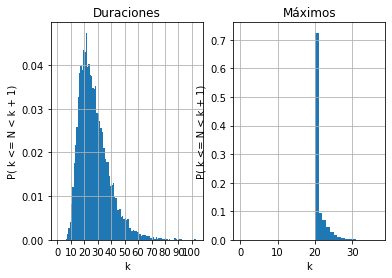

In [306]:
plt.subplot(121)
hist_for_ints(duraciones, 'Duraciones')
plt.subplot(122)
hist_for_ints(maximos, 'Máximos')

## Algunas realizaciones

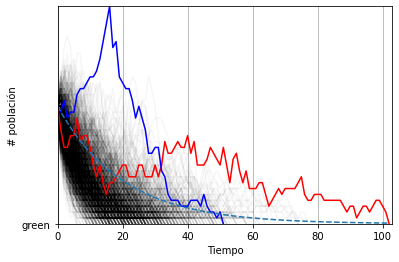

In [307]:
mas_largo = max(exps, key=len)
mas_populoso = max(exps, key=max)
for i in range(1000):
    plt.plot(np.array(exps[i]), color='black', alpha=1/30) # estaría bueno entender alpha = f(# líneas)
    plt.axis([0, len(mas_largo), 0, max(mas_populoso)])
plt.plot(mas_largo, color='red')
plt.plot(mas_populoso, color='blue')
plt.xlabel('Tiempo')
plt.ylabel('# población')

ns = np.arange(len(mas_largo))
plt.plot(ns, 20*np.exp(-(mortalidad - natalidad)*ns), '--', 'green')
plt.grid()